In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [ ]:
df = pd.read_csv("../input/heart-attack-analysis-prediction-dataset/heart.csv")
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
#shape and description
print(f"Shape is: {df.shape}")
print("==================================================")
print(f"Summary statistics: {df.describe()}")

Shape is: (303, 14)
Summary statistics:               age         sex          cp      trtbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg    thalachh        exng     oldpeak         slp         caa  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340   

In [ ]:
#check for missing values
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [ ]:
df['trtbps'].unique()

array([145, 130, 120, 140, 172, 150, 110, 135, 160, 105, 125, 142, 155,
       104, 138, 128, 108, 134, 122, 115, 118, 100, 124,  94, 112, 102,
       152, 101, 132, 148, 178, 129, 180, 136, 126, 106, 156, 170, 146,
       117, 200, 165, 174, 192, 144, 123, 154, 114, 164])

In [ ]:
#replace Null by 120
df['trtbps'].fillna(value=120,inplace=True)

In [ ]:
df['trtbps'].unique()

array([145, 130, 120, 140, 172, 150, 110, 135, 160, 105, 125, 142, 155,
       104, 138, 128, 108, 134, 122, 115, 118, 100, 124,  94, 112, 102,
       152, 101, 132, 148, 178, 129, 180, 136, 126, 106, 156, 170, 146,
       117, 200, 165, 174, 192, 144, 123, 154, 114, 164])

In [ ]:
# Recheck for Null in the dataset
df.isna().any()

age         False
sex         False
cp          False
trtbps      False
chol        False
fbs         False
restecg     False
thalachh    False
exng        False
oldpeak     False
slp         False
caa         False
thall       False
output      False
dtype: bool

In [ ]:
#checking if the data is imbalanced
df.output.value_counts()

1    165
0    138
Name: output, dtype: int64

In [ ]:
#checking the maximum correlation of the output with other variables
df.corr().abs()['output'].sort_values(ascending = False)

output      1.000000
exng        0.436757
cp          0.433798
oldpeak     0.430696
thalachh    0.421741
caa         0.391724
slp         0.345877
thall       0.344029
sex         0.280937
age         0.225439
trtbps      0.144931
restecg     0.137230
chol        0.085239
fbs         0.028046
Name: output, dtype: float64

In [ ]:
df[df.duplicated()]
df.drop_duplicates(keep='first',inplace=True)
df.shape

(302, 14)

In [ ]:
X = df.drop('output', axis = 1)
y = df['output']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size = 0.2, random_state = 0)

In [ ]:
print("X_train shape: {}".format(X_train.shape))

print("y_train shape: {}".format(y_train.shape))

print("X_test shape: {}".format(X_test.shape))

print("y_test shape: {}".format(y_test.shape))

print("X_validation shape: {}".format(X_validation.shape))

print("y_validation shape: {}".format(y_validation.shape))

X_train shape: (192, 13)
y_train shape: (192,)
X_test shape: (61, 13)
y_test shape: (61,)
X_validation shape: (49, 13)
y_validation shape: (49,)


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_validation = sc.transform(X_validation)

In [ ]:
from sklearn.svm import SVC
classifier = SVC()
classifier.fit(X_train, y_train)

SVC()

In [ ]:
classifier.score(X_train, y_train) 

0.9114583333333334

In [ ]:
y_pred_val = classifier.predict(X_validation)
accuracy_score(y_validation, y_pred_val)

0.8367346938775511

In [ ]:
print(classifier.predict(sc.transform([[20,1,3,120,200,0,1,144,0,2.5,2,0,2]])))

[1]


/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
y_pred = classifier.predict(X_test)

print("The test accuracy score of SVM is ", accuracy_score(y_test, y_pred))

The test accuracy score of SVM is  0.8852459016393442


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score 
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[26  3]
 [ 4 28]]


0.8852459016393442

In [ ]:
from sklearn.metrics import roc_curve, auc
y_pred = classifier.predict(X_test).ravel()

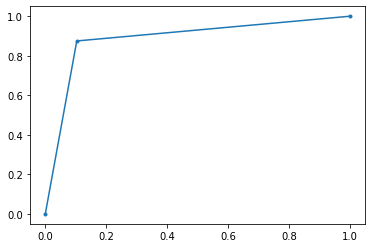

In [ ]:
nn_fpr_keras, nn_tpr_keras, nn_thresholds_keras = roc_curve(y_test  , y_pred)
auc_keras = auc(nn_fpr_keras, nn_tpr_keras)
plt.plot(nn_fpr_keras, nn_tpr_keras, marker='.', label='SVM' % auc_keras)

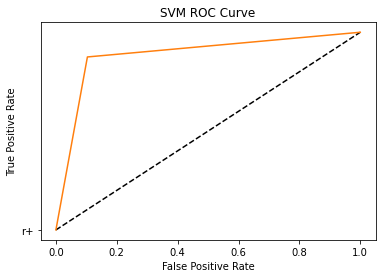

In [ ]:
# instantiating the roc_cruve
fpr,tpr,threshols=roc_curve(y_test,y_pred)

# plotting the curve
plt.plot([0,1],[0,1],"k--",'r+')
plt.plot(fpr,tpr,label='SVM')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("SVM ROC Curve")
plt.show()

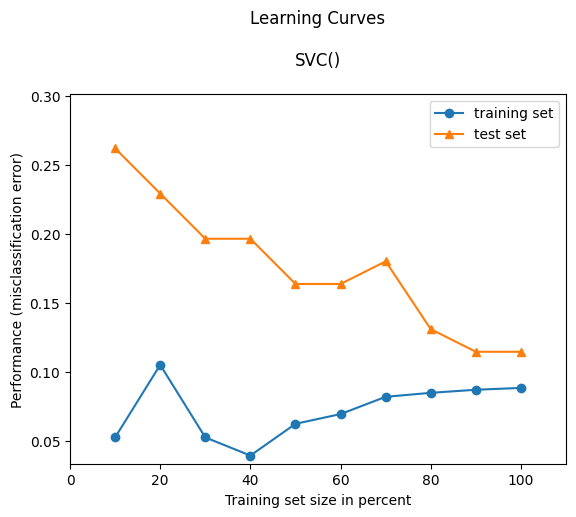

In [ ]:
from mlxtend.plotting import plot_learning_curves
plot_learning_curves(X_train, y_train, X_test, y_test, classifier)
plt.show()